In [4]:
!pip install opencv-contrib-python

In [3]:
import cv2
print(cv2.__version__)

4.5.3


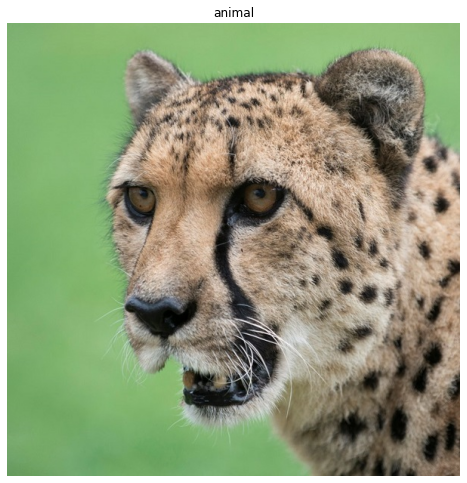

In [15]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
img_src = cv2.imread('images/animal-07.jpg',cv2.IMREAD_COLOR)

# matplotlib 사용하여 결과 출력
img_rgb = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)

dpi = matplotlib.rcParams['figure.dpi']
# Determine the figures size in inches to fit your image
height, width = img_src.shape[:2]
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(img_rgb)
plt.title('animal')
plt.axis('off')

# opencv사용하고 화면 출력
cv2.imshow('animal',img_src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np


# 이미지를 컬러로 로드하여 넘파이 배열 형태로 img에 대입합니다. 
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

# 이미지가 저장된 넘파이 배열의 너비와 높이를 구합니다. 
height,width = img.shape[:2]


# 이동 변환 행렬을 생성합니다. x 방향으로 100픽셀, y 방향으로 200필셀 이동합니다.
M = np.array([[1, 0, 100], [0, 1, 200], [0, 0, 1]], dtype=float)

# 결과 이미지를 저장할 넘파이 배열을 입력 이미지와 같은 크기로 생성합니다.
dst = np.zeros(img.shape, dtype=np.uint8)


# 이미지의 전체 픽셀을 스캔합니다. 
for y in range(height-1):
    for x in range(width-1):
        # 현재 픽셀 p의 좌표에 이동 변환 행렬 M을 곱하여 이동시킨 좌표 p_를 구합니다. 
        p = np.array([x, y, 1])
        p_ = np.dot(M, p)
        
        # 이동한 위치인 p_에서 좌표 x_,y_를 정수 형태로 가져옵니다.
        x_,y_ = p_[:2]
        x_ = int(x_)
        y_ = int(y_)
        
        # 입력 이미지 크기 내로 픽셀이 이동한 경우에만 결과 저장할넘파이 배열로 픽셀을 복사합니다. 
        if x_ > 0 and x_ < width and y_ > 0 and y_ < height:
            dst[y_, x_] = img[y, x]

# 입력 이미지와 결과 이미지를 수평으로 연결하여 하나의 이미지로 만듭니다. 
result = cv2.hconcat([img, dst])

# 타이틀바에 result 문자열을 보여주는 윈도우에 이미지 result를 보여줍니다.  
cv2.imshow("result", result)

# 아무키나 누르기 전까지 대기합니다.
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)
height,width = img.shape[:2]

M = np.array([[1, 0, 100], [0, 1, 200]], dtype=float)

# warpAffine 함수를 사용하여 이동 변환 행렬을 적용합니다. 
dst = cv2.warpAffine(img, M, (width, height))

result = cv2.hconcat([img, dst])

cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()